Is  enforcing 0 correlation between the different dimensions by using a multivariate covariance matrix with 0 off-diagonals is the same as having 0 expectation of correlation by having the dimensions simulated separately?

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import copy
import time

In [3]:
d = 3
n = 1000
plot = True

In [4]:
np.random.seed(seed=101)
psi = np.diagflat(np.diag(np.random.rand(d,d)))

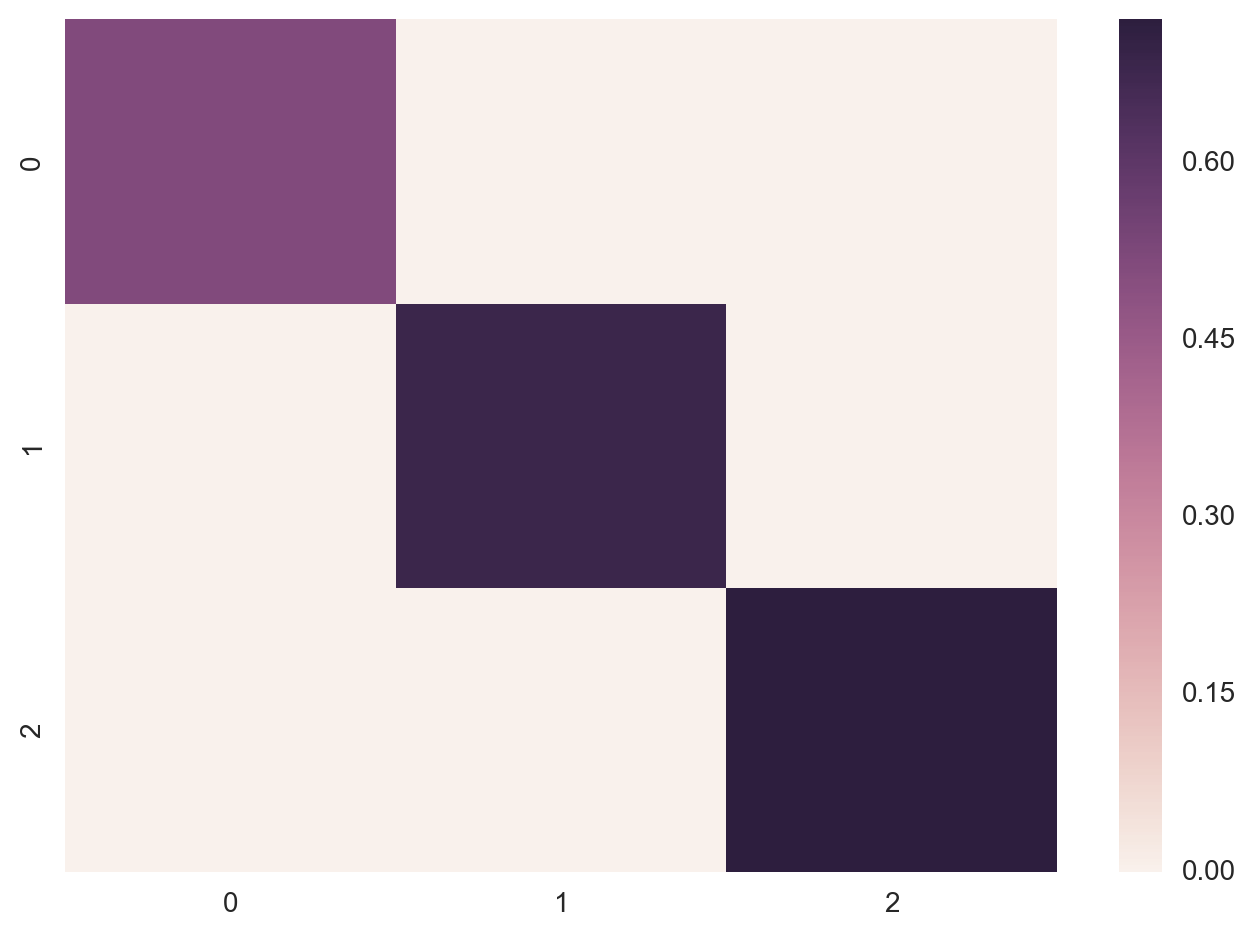

In [5]:
if plot: 
    sns.heatmap(psi)

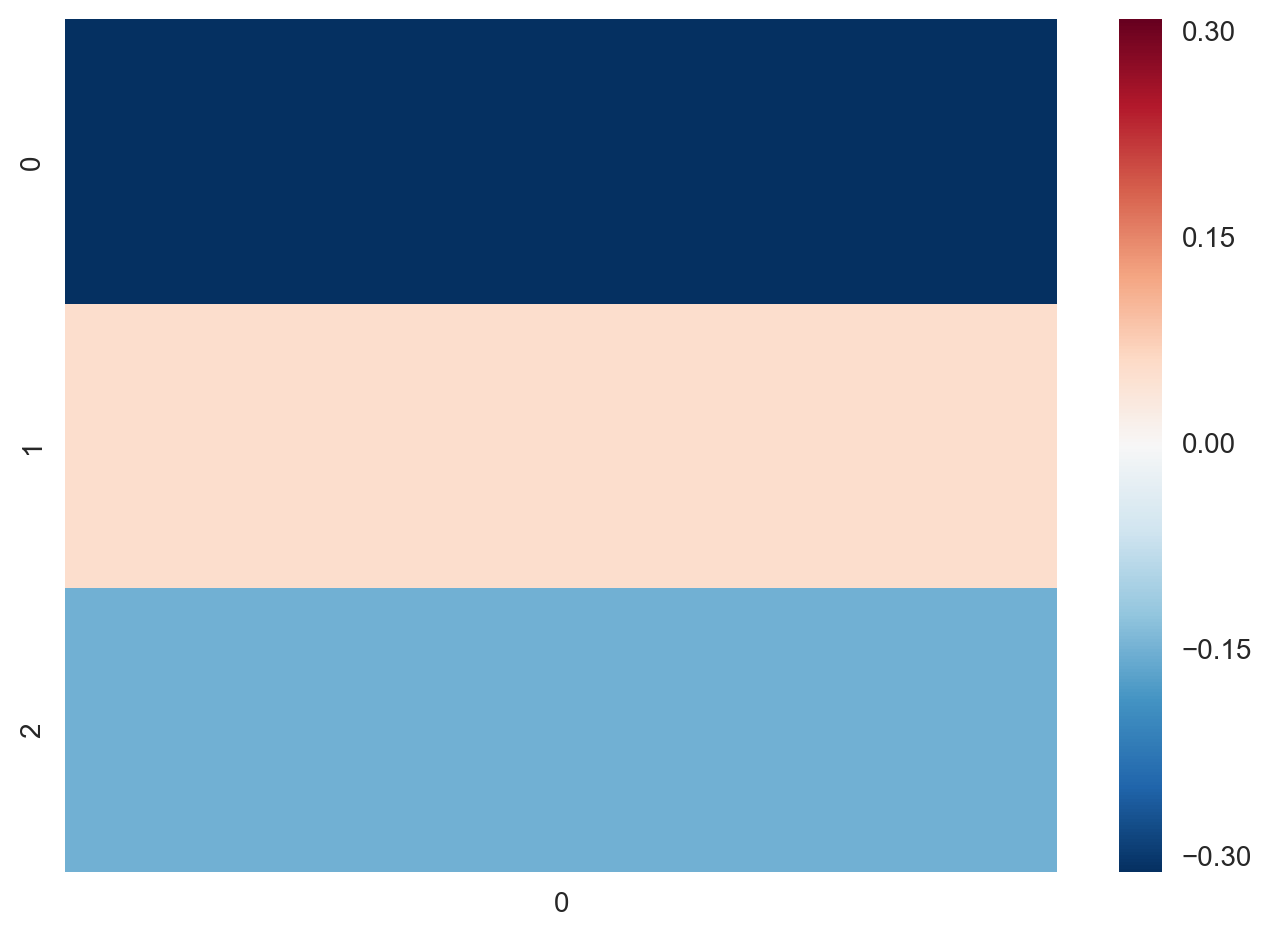

In [6]:
mu = np.random.rand(d) - 0.5
if plot:
    sns.heatmap(np.reshape(mu,(d,1)))

# Multivariate 

In [7]:
start = time.time()
multivar_result = np.random.multivariate_normal(mean=mu, cov=psi, size=n)
elapsed = time.time() - start
print "Multivariate: {0:.1f} seconds".format(elapsed)


Multivariate: 0.0 seconds


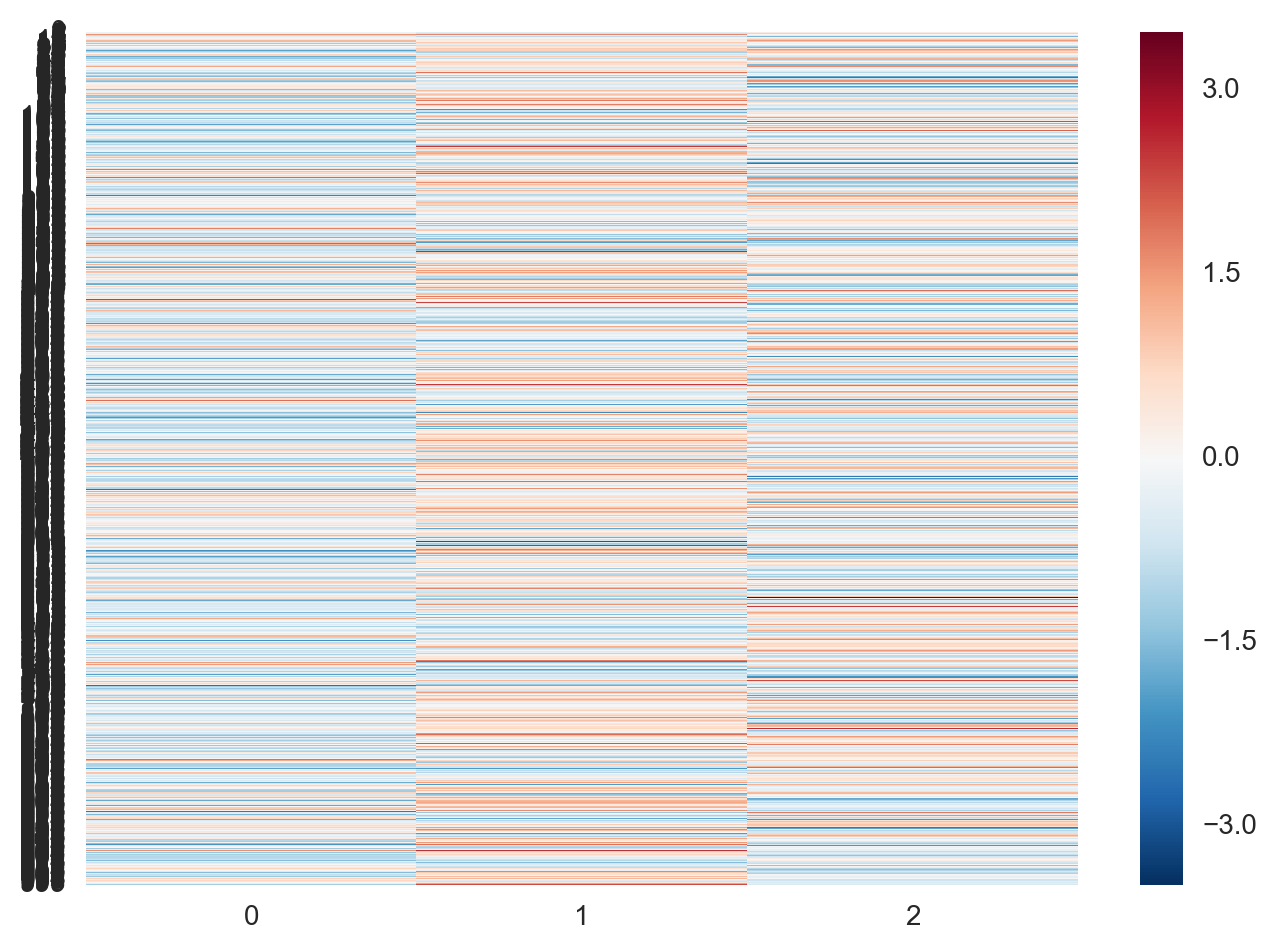

In [8]:
if plot: 
    sns.heatmap(multivar_result)

Empirical covariance matrix

In [9]:
multivar_empirical_cov = np.cov(multivar_result, rowvar=False)

# Univariate

Univariate: 0.0 seconds


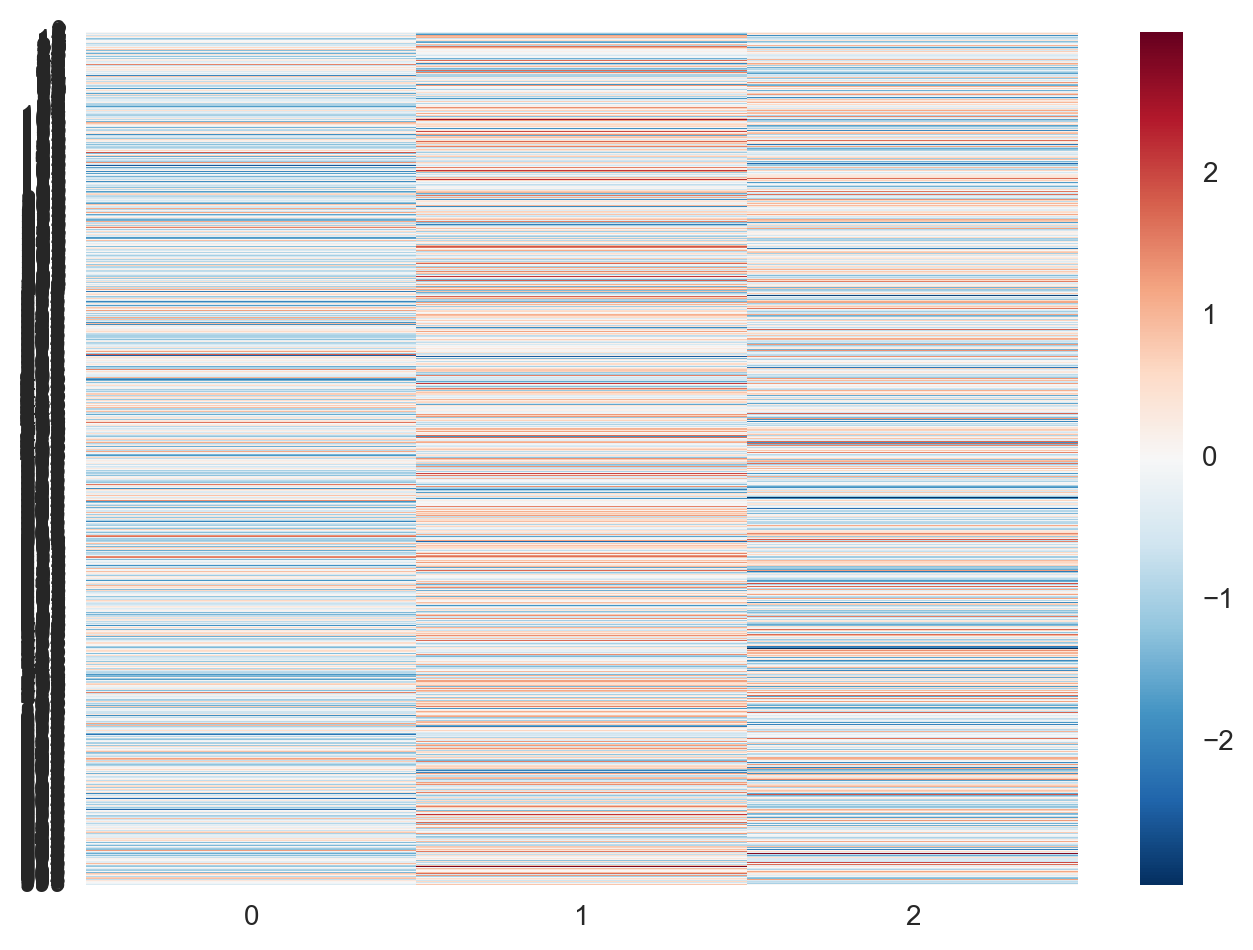

In [10]:
start = time.time()
univar_result = np.array([np.random.normal(loc=mu_i, scale=np.sqrt(psi_i), size=n) for (mu_i, psi_i) in zip(mu, np.diag(psi))]).T
elapsed = time.time() - start
print "Univariate: {0:.1f} seconds".format(elapsed)
if plot:
    sns.heatmap(univar_result)

# Compare Values

In [11]:
univar_empirical_cov = np.cov(univar_result, rowvar=False)

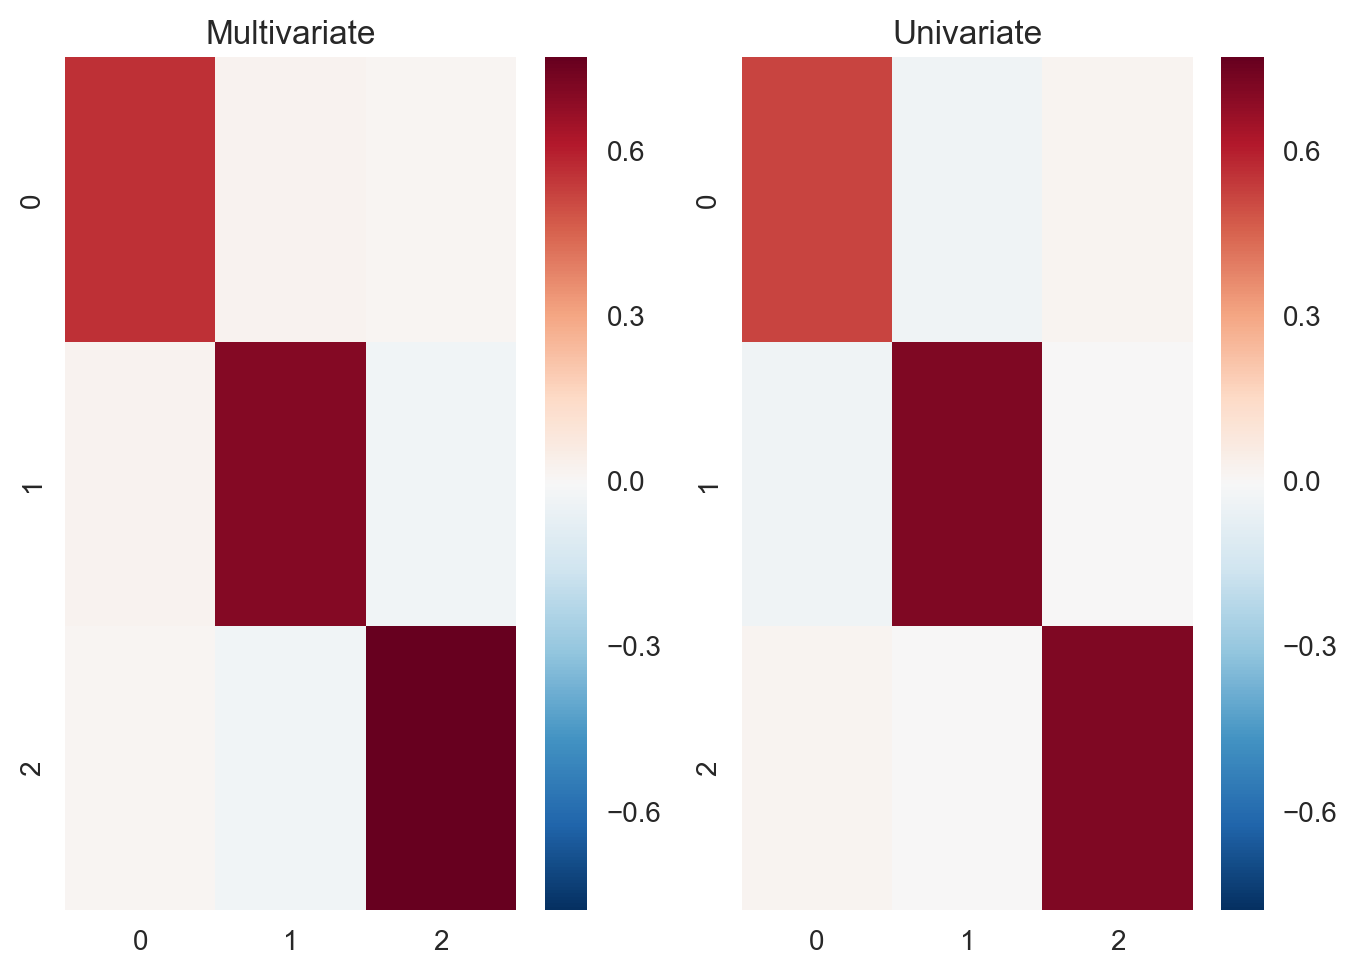

In [12]:
if plot:
    f, (ax1, ax2) = plt.subplots(1,2)
    sns.heatmap(multivar_empirical_cov, ax=ax1, vmin=np.min([univar_empirical_cov, multivar_empirical_cov]), vmax = np.max([univar_empirical_cov, multivar_empirical_cov]))
    sns.heatmap(univar_empirical_cov, ax=ax2, vmin=np.min([univar_empirical_cov, multivar_empirical_cov]), vmax = np.max([univar_empirical_cov, multivar_empirical_cov]))
    ax1.set_title("Multivariate")
    ax2.set_title("Univariate")

$\Rightarrow$ it's pretty much the same asymptotically!

In [13]:
multivar_empirical_cov_copy = copy.deepcopy(multivar_empirical_cov)
univar_empirical_cov_copy = copy.deepcopy(univar_empirical_cov)

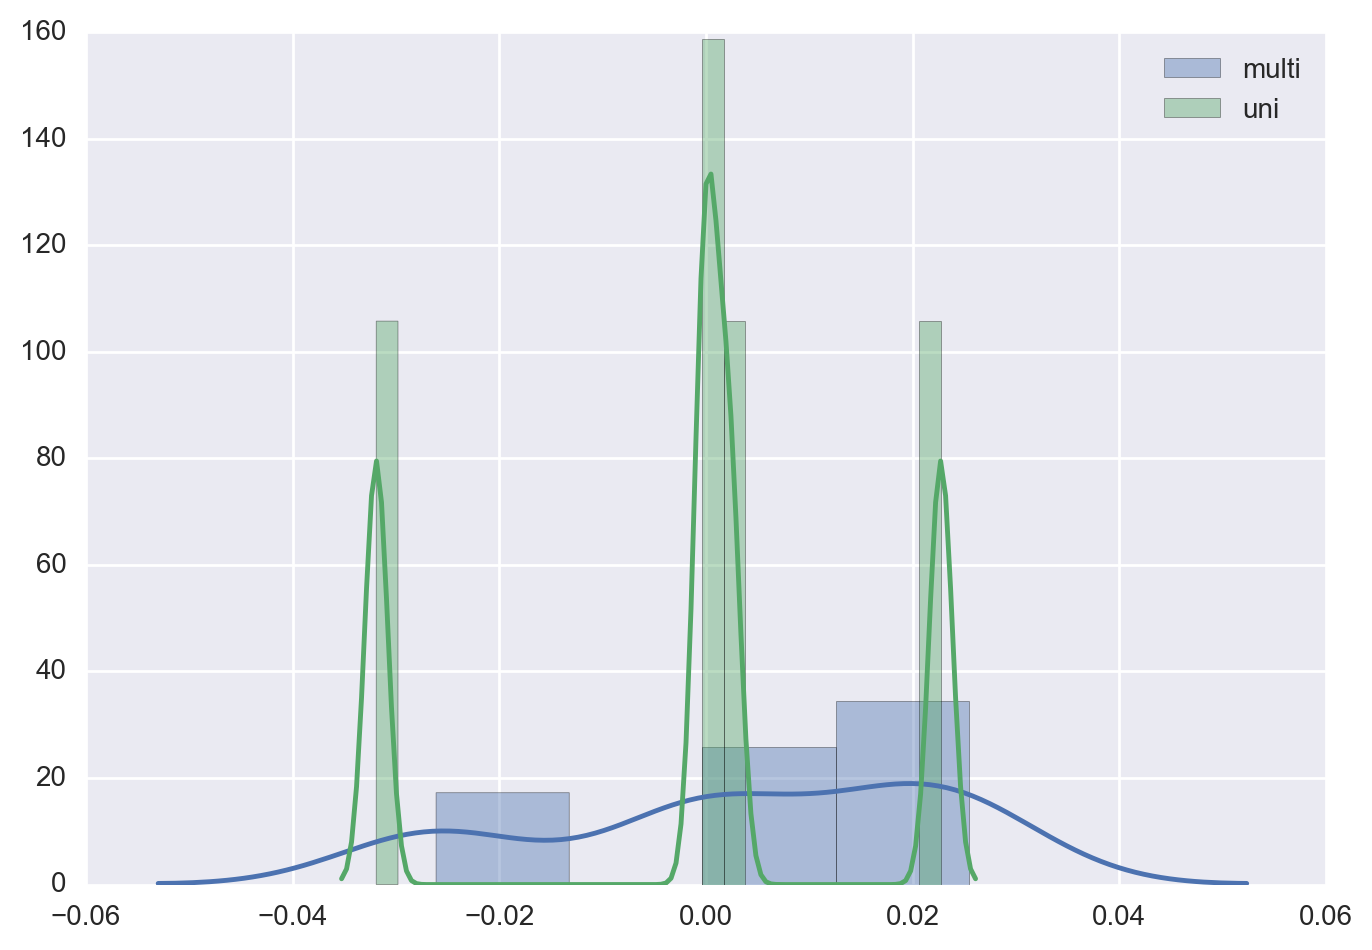

In [14]:
np.fill_diagonal(multivar_empirical_cov_copy, 0)
np.fill_diagonal(univar_empirical_cov_copy, 0)

if plot:
    sns.distplot(multivar_empirical_cov_copy.ravel(), label="multi")
    ax = sns.distplot(univar_empirical_cov_copy.ravel(), label="uni")
    ax.legend()

$\Rightarrow$ but off-diagonals look different, actually kind of as expected... multivariate are closer to 0, but univariate approaches 0 off-diagonal covariance asymptotically. 

# Compare Timing

In [15]:
def univar_sim(d):   
    start = time.time()
    psi = np.diagflat(np.diag(np.random.rand(d,d)))
    mu = np.random.rand(d) - 0.5
    np.array([np.random.normal(loc=mu_i, scale=np.sqrt(psi_i), size=n) for (mu_i, psi_i) in zip(mu, np.diag(psi))]).T
    return time.time() - start

def multivar_sim(d):
    start = time.time()
    psi = np.diagflat(np.diag(np.random.rand(d,d)))
    mu = np.random.rand(d) - 0.5
    np.random.multivariate_normal(mean=mu, cov=psi, size=n)
    return time.time() - start


In [16]:
dims = np.array([10,100,500, 1000,1500,3000])
univar_times = []
multivar_times = []

for d in dims:
    univar_times += [univar_sim(d)]
    multivar_times += [multivar_sim(d)]
    
    

    


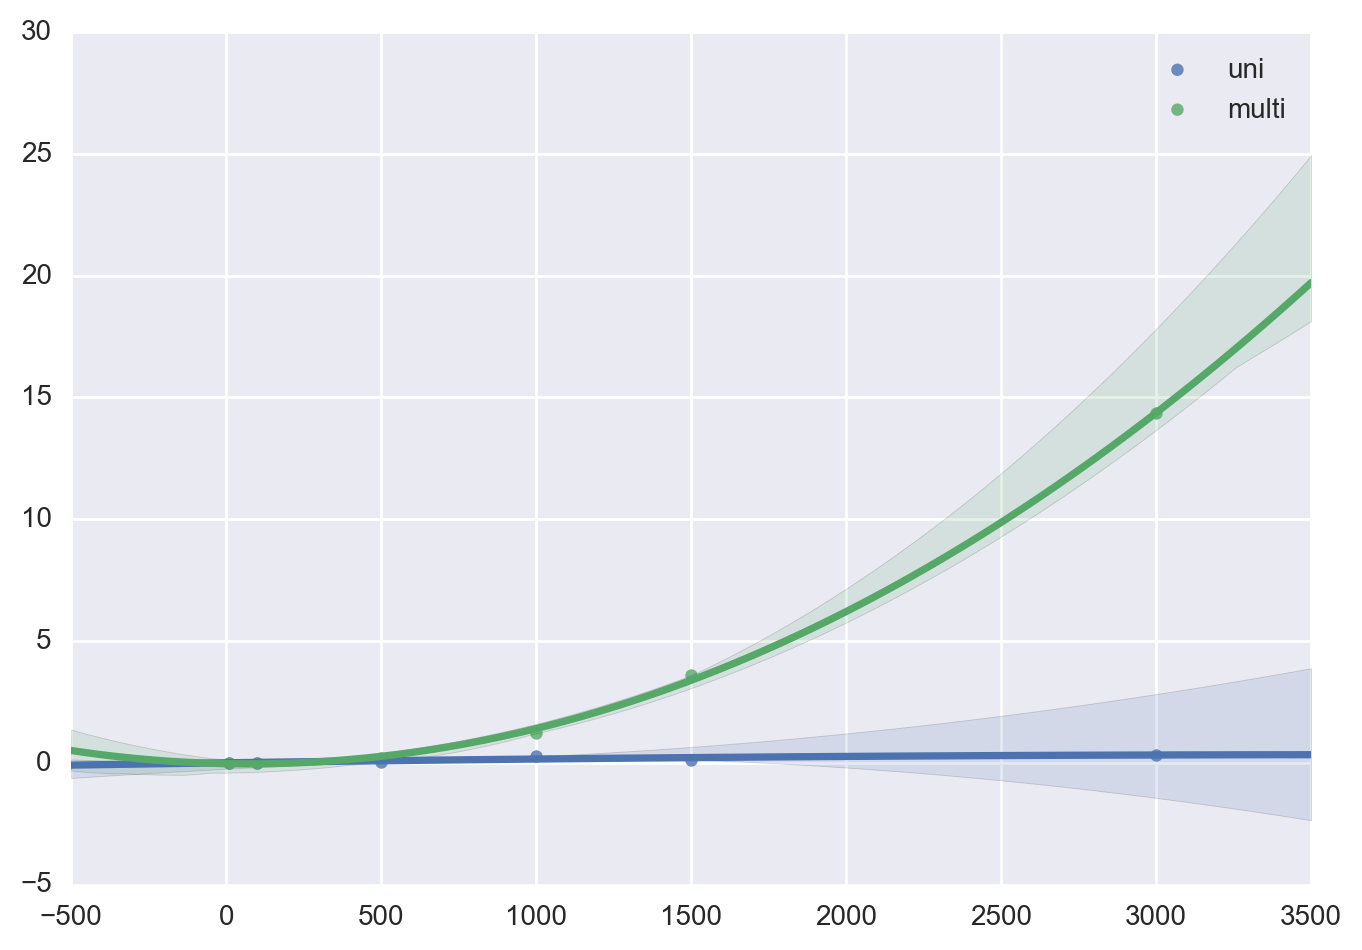

In [17]:
import warnings
warnings.filterwarnings('ignore')
sns.regplot(x=dims,y=np.array(univar_times), label="uni", order=2)
ax = sns.regplot(x=dims,y=np.array(multivar_times), label="multi", order=2)
ax.legend()
